# The development in key expense figures in Denmark over the last 10 years

# Introduction

We will in this project give a brief overview of the development in key expense figures accross municipalities in Denmark covering the period from 2008 - 2018. First we will look at the development in the long term debt in each municipality, but we will extend it to cover a broader range of expense figures later in the project. 

In [1]:
# Import varios packages used in the Project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Fetching data from Statistics Denmark using an API
import pydst
dst = pydst.Dst(lang='da')

In [3]:
# Import data from excel
#raw download from DST
# note: the file must be in a sub folder "data" to the folder where jupyter was launched
import os 
os.listdir('./data/')
# define filename refering to the path of the file.
filename = './Data/NGLK1.xlsx'

# Read and clean data

## Debt Data

In [4]:
# A quick overview of the data
pd.read_excel(filename).head(10)

,"Udvalgte kommunale regnskabstal efter prisenhed, brutto-/nettoudgifter, nøgletal, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Enhed: kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
2,Faste priser,Nettoudgifter,Langfristet gæld pr. indbygger,Hele landet,16644.0,16414.0,16762.0,16299.0,16353.0,16472.0,16222.0,15818.0,15394.0,14625.0,14099.0
3,NaN,NaN,NaN,Region Hovedstaden,17825.0,17065.0,17171.0,15715.0,15319.0,15046.0,14463.0,13623.0,13111.0,12164.0,11644.0
4,NaN,NaN,NaN,København,12106.0,10394.0,9873.0,6426.0,5672.0,4969.0,4376.0,3738.0,3260.0,2771.0,2680.0
5,NaN,NaN,NaN,Frederiksberg,28300.0,27436.0,26173.0,25347.0,23146.0,22280.0,20491.0,18645.0,17191.0,15361.0,15255.0
6,NaN,NaN,NaN,Dragør,16222.0,16075.0,16858.0,20079.0,23060.0,26820.0,26019.0,23852.0,22101.0,18164.0,17179.0
7,NaN,NaN,NaN,Tårnby,83.0,66.0,84.0,65.0,50.0,38.0,23.0,15.0,9.0,4.0,1.0
8,NaN,NaN,NaN,Albertslund,18424.0,17985.0,21608.0,21485.0,20686.0,19455.0,18901.0,18499.0,25241.0,24523.0,25570.0
9,NaN,NaN,NaN,Ballerup,17584.0,17122.0,19601.0,18737.0,17730.0,16078.0,15465.0,14510.0,13826.0,13064.0,12826.0


**Read the data for long term debt in the muni** in ``NGLK.xlsx`` and **clean it** removing and renaming columns:

In [6]:
# Getting the right columns and rows

#a) Skip first 3 rows
debt = pd.read_excel(filename, skiprows=2)
debt.head(10)

# b) The first couple of columns are not needed and contain only missing values (denoted by NaN (Not a Number)), so we will drop those.
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']
debt.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
debt.head(10)

# c) We rename the first column 'Unnamed: 3'
debt.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)
debt.head(10)



,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,16644.0,16414.0,16762.0,16299.0,16353.0,16472.0,16222.0,15818.0,15394.0,14625.0,14099.0
1,Region Hovedstaden,17825.0,17065.0,17171.0,15715.0,15319.0,15046.0,14463.0,13623.0,13111.0,12164.0,11644.0
2,København,12106.0,10394.0,9873.0,6426.0,5672.0,4969.0,4376.0,3738.0,3260.0,2771.0,2680.0
3,Frederiksberg,28300.0,27436.0,26173.0,25347.0,23146.0,22280.0,20491.0,18645.0,17191.0,15361.0,15255.0
4,Dragør,16222.0,16075.0,16858.0,20079.0,23060.0,26820.0,26019.0,23852.0,22101.0,18164.0,17179.0
5,Tårnby,83.0,66.0,84.0,65.0,50.0,38.0,23.0,15.0,9.0,4.0,1.0
6,Albertslund,18424.0,17985.0,21608.0,21485.0,20686.0,19455.0,18901.0,18499.0,25241.0,24523.0,25570.0
7,Ballerup,17584.0,17122.0,19601.0,18737.0,17730.0,16078.0,15465.0,14510.0,13826.0,13064.0,12826.0
8,Brøndby,12950.0,12119.0,13404.0,14888.0,15024.0,15117.0,14482.0,13785.0,12012.0,11111.0,9589.0
9,Gentofte,8719.0,7971.0,8322.0,8365.0,7895.0,12398.0,16949.0,18037.0,18377.0,19440.0,19351.0


We also see that the longterm debt. pr. capita in 2008 has been named 2008. Having a variable that is named a number can cause problems with some functions, so we change their names. To do so, we need to create a dictionary that maps each of the years {2008, ..., 2018} to {debt2008, ..., debt2018}.

In [7]:
myDict = {}
for i in range(2008, 2019): # range goes from 2008 to but not including 2019
    myDict[str(i)] = f'debt{i}' 

# Rename columns
debt.rename(columns = myDict, inplace=True)
debt.head(10)

,municipality,debt2008,debt2009,debt2010,debt2011,debt2012,debt2013,debt2014,debt2015,debt2016,debt2017,debt2018
0,Hele landet,16644.0,16414.0,16762.0,16299.0,16353.0,16472.0,16222.0,15818.0,15394.0,14625.0,14099.0
1,Region Hovedstaden,17825.0,17065.0,17171.0,15715.0,15319.0,15046.0,14463.0,13623.0,13111.0,12164.0,11644.0
2,København,12106.0,10394.0,9873.0,6426.0,5672.0,4969.0,4376.0,3738.0,3260.0,2771.0,2680.0
3,Frederiksberg,28300.0,27436.0,26173.0,25347.0,23146.0,22280.0,20491.0,18645.0,17191.0,15361.0,15255.0
4,Dragør,16222.0,16075.0,16858.0,20079.0,23060.0,26820.0,26019.0,23852.0,22101.0,18164.0,17179.0
5,Tårnby,83.0,66.0,84.0,65.0,50.0,38.0,23.0,15.0,9.0,4.0,1.0
6,Albertslund,18424.0,17985.0,21608.0,21485.0,20686.0,19455.0,18901.0,18499.0,25241.0,24523.0,25570.0
7,Ballerup,17584.0,17122.0,19601.0,18737.0,17730.0,16078.0,15465.0,14510.0,13826.0,13064.0,12826.0
8,Brøndby,12950.0,12119.0,13404.0,14888.0,15024.0,15117.0,14482.0,13785.0,12012.0,11111.0,9589.0
9,Gentofte,8719.0,7971.0,8322.0,8365.0,7895.0,12398.0,16949.0,18037.0,18377.0,19440.0,19351.0


**Remove all rows which are not municipalities, but keep whole country**:

Now we choose to drop observations that are not actually municipalities, but we still wish to keep the observation for the whole country for comparison.

The dataset contains observations like "Region Hovedstaden", which is not a municipality, so we want to drop such rows. To do this, we can use the df['var'].str functionalities, in particular df['var'].str.contains('PATTERN'). These rows are then deleted.

In [8]:
for val in ['Region', 'Landsdel']: 
    I = debt.municipality.str.contains(val)
    debt = debt.loc[I == False] # keep everything else
debt.head(5)

,municipality,debt2008,debt2009,debt2010,debt2011,debt2012,debt2013,debt2014,debt2015,debt2016,debt2017,debt2018
0,Hele landet,16644.0,16414.0,16762.0,16299.0,16353.0,16472.0,16222.0,15818.0,15394.0,14625.0,14099.0
2,København,12106.0,10394.0,9873.0,6426.0,5672.0,4969.0,4376.0,3738.0,3260.0,2771.0,2680.0
3,Frederiksberg,28300.0,27436.0,26173.0,25347.0,23146.0,22280.0,20491.0,18645.0,17191.0,15361.0,15255.0
4,Dragør,16222.0,16075.0,16858.0,20079.0,23060.0,26820.0,26019.0,23852.0,22101.0,18164.0,17179.0
5,Tårnby,83.0,66.0,84.0,65.0,50.0,38.0,23.0,15.0,9.0,4.0,1.0


**Convert the dataset to long format**:

Transforming the data set from wide to long: In general, Pandas will assume that the variables in the wide format have a particular structure: namely they are of the form XPERIOD, where X is called the "stub". In our case, the variable names are e.g. debt2011, so the stub is 'debt' and the period (for that variable) is 2011. we also reset the index.

In [15]:
# a. convert to long and reset index
debt_long = pd.wide_to_long(debt, stubnames='debt', i='municipality', j='year').reset_index()

# b. show
debt_long.head()

,municipality,year,debt
0,Hele landet,2008,16644.0
1,København,2008,12106.0
2,Frederiksberg,2008,28300.0
3,Dragør,2008,16222.0
4,Tårnby,2008,83.0


In [27]:
# Creating a new column, which is identical to another column. (used for plotting below)
debt_long['municipality2']=debt_long['municipality']
debt_long.head(5)

,municipality,year,debt,municipality2
0,Hele landet,2008,16644.0,Hele landet
1,København,2008,12106.0,København
2,Frederiksberg,2008,28300.0,Frederiksberg
3,Dragør,2008,16222.0,Dragør
4,Tårnby,2008,83.0,Tårnby


## Explore data set

In order to be able to get an overview of longterm debt pr. capita across municipalities we  use the function df.describe() to get some simple summary statistics. Note that each observation (municipality) is weighted equally.

In [28]:
debt.describe().round(2)

,debt2008,debt2009,debt2010,debt2011,debt2012,debt2013,debt2014,debt2015,debt2016,debt2017,debt2018
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,18658.16,18536.37,19079.03,18926.02,19036.25,19261.79,19854.43,19520.00,18890.54,17947.05,17281.02
std,10847.31,10182.94,10843.48,10267.29,9833.88,9717.37,13720.32,14537.35,14131.73,13320.57,12840.25
min,83.00,66.00,84.00,65.00,50.00,38.00,23.00,15.00,9.00,4.00,1.00
25%,12919.50,12666.50,13281.00,13212.50,13578.00,13777.00,13568.00,13501.00,13009.50,12289.00,11745.50
50%,16518.00,17050.00,16684.00,17590.00,17396.00,17770.00,17648.00,17466.00,17095.00,15634.00,15696.00
75%,21476.00,22263.50,22194.50,21475.50,21632.50,22302.50,21602.00,21741.50,21164.50,20842.50,19669.00
max,91330.00,85709.00,91049.00,87179.00,83712.00,80931.00,119926.00,132008.00,128437.00,119185.00,114280.00


And to get a picture of only the mean debt pr. capita pr. year

In [29]:
debt.mean().round(2)

debt2008    18658.16
debt2009    18536.37
debt2010    19079.03
debt2011    18926.02
debt2012    19036.25
debt2013    19261.79
debt2014    19854.43
debt2015    19520.00
debt2016    18890.54
debt2017    17947.05
debt2018    17281.02
dtype: float64

We see from the summary statistics that the mean of the long-term debt accros municipalities have decreased marginally over the 10 years, but overall it has reamained rather constant. Highest in 2014 and lowest in 2018. We see that the minimum debt level has decreased from 83 in 2008 to 1.00 in 2018, while the standard deviation, i.e. the variance of the debt level has increased. Thus have seen a small drop in the overall debt level, but the variation in debt level have increased.

The **Simple plot** of the dent level for one municipality is:

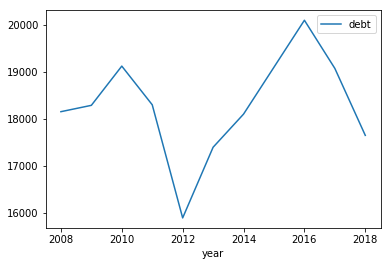

In [45]:
debt_long.loc[debt_long['municipality2'] == 'Køge', :].plot(x='year',y='debt'); 

However, we want to visually plot the same figure interactively for each municipality and compare them to the country as a whole. This is done below:

In [37]:
# a) Import the relevant package
import ipywidgets as widgets

# define af simple function for plot for two different municipalities.
def plot_e(dataframe, municipality,municipality2): 
    I = dataframe['municipality'] == municipality
    J = dataframe['municipality2'] == municipality2 
    
#a) uses the dataframe's build in function for plotting
    ax_left=dataframe.loc[I,:].plot(x='year', style='-o', legend='False')
    ax_right=dataframe.loc[J,:].plot(x='year', style='-o', legend='False')
#b) Specifies the labels on the y-axis and the title
    ax_left.set_title('Long-term debt pr. capita in the municipality')
    ax_left.set_ylabel('Long-term debt pr. capita (kr.)')
    ax_right.set_title('(Net) Long-term debt pr. capita in the municipality')
    ax_right.set_ylabel('(Net) Long-term debt pr. capita (kr.)')

In [47]:
# b) creating the interactively plot
widgets.interact(plot_e, 
    dataframe = widgets.fixed(debt_long),            
    municipality = widgets.Dropdown(description='Municipality1', options= debt_long.municipality.unique(), value='København'),
    municipality2 = widgets.Dropdown(description='Municipality2', options=debt_long.municipality2.unique(), value='Lejre')             
);

interactive(children=(Dropdown(description='Municipality1', index=1, options=('Hele landet', 'København', 'Fre…

As the above graph shows it seems that the average long-term debt has decreased as suspected giving the simple descriptive statistics. Some municipalities (such as copenhagen) has experinced a rather smooth decrease, while Lejre has experinced a large decrease in 2012, and then a small increase after wards.

In [34]:
# Create a new column with only values for the Whole country to include in the above graphs for comparison;

#a) Define a new dataframe, where only the first entries/observation of a new year remains - namely the observation for the whole country.
newdebt_tall=debt_tall.drop_duplicates('year')

#b) Defnies a new column 'Hele Landet' equal the Longterm debt for whole country. However, it will put NaN for non-first id rows:.
newdebt_tall['Hele Landet'] = newdebt_tall['g']

# c) Merge the newdataframe with the original one to add a new column to 'debt_tall' with only values for 'Hele landet'
newdebt_tall = debt_tall.merge(newdebt_tall, how='outer')

#d) We change these NaN to previous values by following simple loop: 

tempval = 0   # a variable to store value temporarily
newy=[] # a emtpy list to intiate the process.
for x in newdebt_tall['Hele Landet']: 
    if not pd.isnull(x): tempval = x
    newy.append(tempval)
    
newdebt_tall['Hele Landet'] = newy

newdebt_tall.head(10)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,municipality,year,g,municipality2,Hele Landet
0,Hele landet,2008,16644.0,Hele landet,16644.0
1,København,2008,12106.0,København,16644.0
2,Frederiksberg,2008,28300.0,Frederiksberg,16644.0
3,Dragør,2008,16222.0,Dragør,16644.0
4,Tårnby,2008,83.0,Tårnby,16644.0
5,Albertslund,2008,18424.0,Albertslund,16644.0
6,Ballerup,2008,17584.0,Ballerup,16644.0
7,Brøndby,2008,12950.0,Brøndby,16644.0
8,Gentofte,2008,8719.0,Gentofte,16644.0
9,Gladsaxe,2008,15269.0,Gladsaxe,16644.0


In [36]:
     
# creating the interactively plot where you can choose to look at two different municipalities compared to average level. 
# We use the defined function plot_e from above.
widgets.interact(plot_e, 
    dataframe = widgets.fixed(newdebt_tall),            
    municipality = widgets.Dropdown(description='Municipality1', options=newdebt_tall.municipality.unique(), value='Køge'),
    municipality2 = widgets.Dropdown(description='Municipality2', options=newdebt_tall.municipality2.unique(), value='Lejre')             
);

interactive(children=(Dropdown(description='Municipality1', index=31, options=('Hele landet', 'København', 'Fr…

The Graphs above gives a quick description of the development in the long-term debt pr. capita within each municipality. It shows that for the country as a whole the longterm debt pr. capita has been decreasing, but locally the picture is more diverse. For a more thorough/broader comparasion between the development in each munipilicatity, one could compare a broader set of key figures for each municipality. This is done below;

In [20]:
# Used for getting an overview of the variablenames and their id.
indk_vars = dst.get_variables(table_id='NGLK')
indk_vars['values'][0][:13]

[{'id': '000', 'text': 'Hele landet'},
 {'id': '084', 'text': 'Region Hovedstaden'},
 {'id': '101', 'text': 'København'},
 {'id': '147', 'text': 'Frederiksberg'},
 {'id': '155', 'text': 'Dragør'},
 {'id': '185', 'text': 'Tårnby'},
 {'id': '165', 'text': 'Albertslund'},
 {'id': '151', 'text': 'Ballerup'},
 {'id': '153', 'text': 'Brøndby'},
 {'id': '157', 'text': 'Gentofte'},
 {'id': '159', 'text': 'Gladsaxe'},
 {'id': '161', 'text': 'Glostrup'},
 {'id': '163', 'text': 'Herlev'}]

In [21]:
# a) Download all of table NGLK and get a quick overview;
nglk_true = dst.get_data(table_id = 'NGLK', variables={'OMRÅDE':['000'], 'BNØGLE':['*'], 'PRISENHED':['*'], 'TID':['*']})
nglk_true.head(10)

#b) Define the following dictionaries
columns_dict = {}
columns_dict['OMRÅDE'] = 'municipality'
columns_dict['BNØGLE'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'
columns_dict['BRUTNETUDG'] = 'Measure'

var_dict = {} # var is for variable
var_dict['Kommunale driftsudgifter pr. indbygger'] = 'Driftsudgifter'
var_dict['Ældre- og handicapudgifter pr. ældre'] = 'Ældreudgifter pr. ældre'
var_dict['Folkeskoleudgifter pr. folkeskoleelev'] = 'Folkeskole'
var_dict['Dagtilbudsudgifter pr. 0-10 årig'] = 'Dagtilbud'
var_dict['Sundhedsudgifter pr. indbygger'] = 'Sundhed'
var_dict['Kulturudgifter pr. indbygger'] = 'Kultur'
var_dict['Transport- og infrastrukturudgifter pr. indbygger'] = 'Transport/infrastruktur'
var_dict['Arbejdsmarkedsforanstaltningsudgifter pr. 16-64 årig'] = 'Arbejdsmarked'
var_dict['Udlignings- og tilskudsbeløb pr. indbygger'] = 'Udligning/Tilskud'
var_dict['Langfristet gæld pr. indbygger'] = 'Gæld'
var_dict['Serviceudgifter pr. indbygger'] = 'Service'
var_dict['Anlægsudgifter pr. indbygger'] = 'Anlæg'

unit_dict = {} # Unit of measure
unit_dict['Faste priser'] = 'real'

# c) rename and replace
nglk_true.rename(columns=columns_dict,inplace=True)

# d) replace data
for key,value in var_dict.items():
   nglk_true.variable.replace(key,value,inplace=True)

for key,value in unit_dict.items():
   nglk_true.unit.replace(key,value,inplace=True)

# e) keep if in var_dict
I = False
for key,value in var_dict.items():
    I = I | (nglk_true.variable == value)
nglk_true = nglk_true[I]

# f) Keep in in unit_dict;
J = False
for key,value in unit_dict.items():
    J = J | (nglk_true.unit == value)
nglk_true = nglk_true[J]
   
# g) convert values to numeric
nglk_true.value = nglk_true.value.astype('float')

# h) summary statistics
nglk_true.groupby(['variable','unit']).describe()

value                                           \
                             count     mean          std      min       25%   
variable                unit                                                  
Anlæg                   real  10.0   2509.3   207.867506   2238.0   2333.50   
Arbejdsmarked           real  10.0   1351.0   508.568798    465.0   1133.00   
Dagtilbud               real  10.0  41179.0  2249.094830  37419.0  39753.75   
Driftsudgifter          real  10.0  58014.6  1824.131343  53803.0  58143.75   
Folkeskole              real  10.0  63616.1  2254.507113  59548.0  61987.75   
Gæld                    real  10.0  15849.4   636.087206  14423.0  15668.50   
Kultur                  real  10.0   1655.2    93.287846   1566.0   1588.50   
Sundhed                 real  10.0   4345.4   812.284597   3158.0   3509.00   
Transport/infrastruktur real  10.0   1552.9    87.051007   1426.0   1515.00   
Udligning/Tilskud       real  10.0 -14910.6  2330.893305 -18491.0 -16017.75   
Ældreudgifter pr. ældre real  10.0  59664.7  4999.643344  54489.0  55159.50   

                                                          year          \
                                  50%       75%      max count    mean   
variable                unit                                             
Anlæg                   real   2458.0   2694.50   2839.0  10.0  2012.5   
Arbejdsmarked           real   1588.0   1715.50   1770.0  10.0  2012.5   
Dagtilbud               real  41800.5  42554.25  44003.0  10.0  2012.5   
Driftsudgifter          real  58418.0  58990.25  59837.0  10.0  2012.5   
Folkeskole              real  64368.5  65362.75  65829.0  10.0  2012.5   
Gæld                    real  16068.5  16197.75  16498.0  10.0  2012.5   
Kultur                  real   1626.5   1696.75   1838.0  10.0  2012.5   
Sundhed                 real   4874.5   4989.50   5075.0  10.0  2012.5   
Transport/infrastruktur real   1546.0   1563.25   1743.0  10.0  2012.5   
Udligning/Tilskud       real -15271.0 -14307.75 -10219.0  10.0  2012.5   
Ældreudgifter pr. ældre real  58574.5  64204.00  67245.0  10.0  2012.5   

                                                                         \
                                  std     min      25%     50%      75%   
variable                unit                                              
Anlæg                   real  3.02765  2008.0  2010.25  2012.5  2014.75   
Arbejdsmarked           real  3.02765  2008.0  2010.25  2012.5  2014.75   
Dagtilbud               real  3.02765  2008.0  2010.25  2012.5  2014.75   
Driftsudgifter          real  3.02765  2008.0  2010.25  2012.5  2014.75   
Folkeskole              real  3.02765  2008.0  2010.25  2012.5  2014.75   
Gæld                    real  3.02765  2008.0  2010.25  2012.5  2014.75   
Kultur                  real  3.02765  2008.0  2010.25  2012.5  2014.75   
Sundhed                 real  3.02765  2008.0  2010.25  2012.5  2014.75   
Transport/infrastruktur real  3.02765  2008.0  2010.25  2012.5  2014.75   
Udligning/Tilskud       real  3.02765  2008.0  2010.25  2012.5  2014.75   
Ældreudgifter pr. ældre real  3.02765  2008.0  2010.25  2012.5  2014.75   

                                      
                                 max  
variable                unit          
Anlæg                   real  2017.0  
Arbejdsmarked           real  2017.0  
Dagtilbud               real  2017.0  
Driftsudgifter          real  2017.0  
Folkeskole              real  2017.0  
Gæld                    real  2017.0  
Kultur                  real  2017.0  
Sundhed                 real  2017.0  
Transport/infrastruktur real  2017.0  
Udligning/Tilskud       real  2017.0  
Ældreudgifter pr. ældre real  2017.0

Below we analyze for the whole country in its entirity, which expenses that have increased much over the years. But in order to make an usuful comparison - all variables is scaled/indexed by the first observation.

In [22]:
# Defining af function to select the first element;
def first(x): # select the first element in a series
    return x.iloc[0]

# Using transform, we wish to make a plot for each variable in dataframe, 'nglk_true';

#a) Makes a copy of the dataframe;
nglk_true_alt = nglk_true.copy()

#b) Groups the data by the variable and the unit.
grouped = nglk_true_alt.groupby(['variable','unit'])

#c) Creates a new indexed variable. (Indexed by the first observation)
nglk_true_alt['indexed'] = grouped['value'].transform(lambda x: x/first(x))

#d) Again a quick overview.
nglk_true_alt.head(50)

,municipality,variable,unit,year,Measure,value,indexed
0,Hele landet,Anlæg,real,2008,Nettoudgifter,2401.0,1.000000
2,Hele landet,Arbejdsmarked,real,2008,Nettoudgifter,465.0,1.000000
4,Hele landet,Dagtilbud,real,2008,Nettoudgifter,42713.0,1.000000
6,Hele landet,Driftsudgifter,real,2008,Nettoudgifter,53803.0,1.000000
8,Hele landet,Folkeskole,real,2008,Nettoudgifter,64844.0,1.000000
10,Hele landet,Kultur,real,2008,Nettoudgifter,1838.0,1.000000
12,Hele landet,Gæld,real,2008,Nettoudgifter,16382.0,1.000000
14,Hele landet,Sundhed,real,2008,Nettoudgifter,3158.0,1.000000
16,Hele landet,Transport/infrastruktur,real,2008,Nettoudgifter,1426.0,1.000000
18,Hele landet,Udligning/Tilskud,real,2008,Nettoudgifter,-10219.0,1.000000


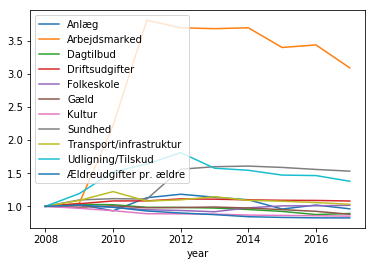

In [23]:
# Plotting by defining a function;
def plot(df):
    df_indexed = df.set_index('year') # Set year as index
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);
    
plot(nglk_true_alt)

And we see that even when scaled by the first observation, the municipalities have witnessed a great increase in expenses concerning labour market activities. Dropping this variable from the above plot as it blurs the development in the rest of the variables yields the following:

In [24]:
nglk_true_altny=nglk_true_alt.copy() # Makes a copy of nglk_true_alt;

# Dropping observations with respect to the variable 'Arbejdsmarked'
for val in ['Arbejdsmarked']: 
    I = nglk_true_altny.variable.str.contains(val)
    nglk_true_altny = nglk_true_altny.loc[I == False] # keep everything else
    
nglk_true_altny.head(10) 


,municipality,variable,unit,year,Measure,value,indexed
0,Hele landet,Anlæg,real,2008,Nettoudgifter,2401.0,1.0
4,Hele landet,Dagtilbud,real,2008,Nettoudgifter,42713.0,1.0
6,Hele landet,Driftsudgifter,real,2008,Nettoudgifter,53803.0,1.0
8,Hele landet,Folkeskole,real,2008,Nettoudgifter,64844.0,1.0
10,Hele landet,Kultur,real,2008,Nettoudgifter,1838.0,1.0
12,Hele landet,Gæld,real,2008,Nettoudgifter,16382.0,1.0
14,Hele landet,Sundhed,real,2008,Nettoudgifter,3158.0,1.0
16,Hele landet,Transport/infrastruktur,real,2008,Nettoudgifter,1426.0,1.0
18,Hele landet,Udligning/Tilskud,real,2008,Nettoudgifter,-10219.0,1.0
20,Hele landet,Ældreudgifter pr. ældre,real,2008,Nettoudgifter,66012.0,1.0


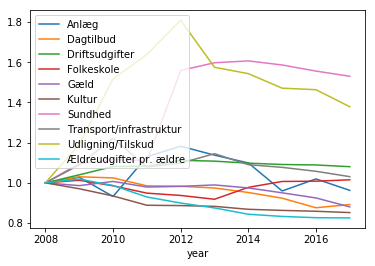

In [25]:
# And plotting again - now without 'Arbejdsmarked' yields;
plot(nglk_true_altny)

And we know see that also 'Udligning og Tilskud/equalization and grants' to the municipalities and health care cost have increased relatively much over the 9 years, though at their highest around 2012. At the same time many other expenses seems to have been relatively stable with some having a negative trend. 

To get a deeper look into each expense type, they are visualized interactively below: 

In [26]:
#  Create a interactive plot for each expense type accross municipalities.

# a) define af simple function for plot;
def plot_d(dataframe,variable): 
    I = dataframe['variable'] == variable
    ax=dataframe.loc[I,:].plot(x='year', y='value', style='-o', legend='False')
    ax.set_title('Development in key expense figure pr. capita accros municipalities (Netto)')
    ax.set_ylabel('Expenditure (netto) pr. capita (kr.)')
    
# c) creating the interactively plot
widgets.interact(plot_d, 
    dataframe = widgets.fixed(nglk_true),  
    #municipality = widgets.Dropdown(description='municipality', options=nglk_true.municipality.unique(), value='Hele landet'),            
    variable = widgets.Dropdown(description='variable', options=nglk_true.variable.unique(), value='Anlæg')                
);

interactive(children=(Dropdown(description='variable', options=('Anlæg', 'Arbejdsmarked', 'Dagtilbud', 'Drifts…

And we see that some expense types have increased, while others have decreased. In general there seem to have been big changes around 2012, and we should pay attention to changes in the definition of the variable over years, which could make comparisons between years rather difficult. 